# ImageNet - Is XAI Methods are Confusing?

In [43]:
DATA_SET = 'ImageNet'

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import copy
import pandas as pd  
import os
import ast
from matplotlib.backends.backend_pdf import PdfPages

In [45]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Reading Data

In [46]:
df = pd.read_csv('../data/ImageNet-Human-Study-Summary.csv')

In [47]:
df.head(5)

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real
0,6386009,ILSVRC2012_val_00027121.JPEG,0,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n02112350,carnivore,canine,dog,1,Easy,1.0,keeshond,keeshond,keeshond,keeshond,0.99,1.00,1.00,1.0,['keeshond'],['n02112350'],['carnivore'],['canine'],['dog']
1,6386009,ILSVRC2012_val_00008987.JPEG,0,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n01980166,invertebrate,invertebrate,invertebrate,1,Easy,0.9,fiddler_crab,fiddler_crab,fiddler_crab,fiddler_crab,0.99,0.95,0.90,0.9,['fiddler_crab'],['n01980166'],['invertebrate'],['invertebrate'],['invertebrate']
2,6386009,ILSVRC2012_val_00043672.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,0,0.733333,22,CHM-NN,n02093428,carnivore,canine,dog,0,Medium,0.6,American_Staffordshire_terrier,American_Staffordshire_terrier,American_Staffordshire_terrier,American_Staffordshire_terrier,0.62,0.85,0.75,0.6,['vizsla'],['n02100583'],['carnivore'],['canine'],['dog']
3,6386009,ILSVRC2012_val_00011479.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,1,0.733333,22,CHM-NN,n04350905,commodity,commodity,commodity,0,Easy,0.2,suit,suit,suit,unicycle,0.33,0.15,0.20,0.2,"['suit', 'Windsor_tie']","['n04350905', 'n04591157']","['commodity', 'commodity']","['commodity', 'commodity']","['commodity', 'commodity']"
4,6386009,ILSVRC2012_val_00034787.JPEG,1,15,15,7,677682.700001,340827,2022-05-01 00:17:34.793,10,0,22,0,0.733333,22,CHM-NN,n07754684,natural_object,natural_object,natural_object,1,Medium,0.4,jackfruit,jackfruit,jackfruit,jackfruit,0.98,0.70,0.45,0.4,['jackfruit'],['n07754684'],['natural_object'],['natural_object'],['natural_object']


In [48]:
print(f"total {len(df)} entries")

total 10800 entries


## Removing Bad Users 

We manually marked two users as **bad** based on their average performance on `1:1` ratio samples

1. `6395881` 
1. `6396044`

And after more analysis, we excluded these: ``6386000, 6382894, 6385998, 6382878``

In [49]:
df = df[~df['UID'].isin([6395881, 6396044, 6386000, 6382894, 6385998, 6382878])]

In [50]:
print(f"total {len(df)} entries")

total 10620 entries


## Orders for Plotting

In [51]:
ORDER_DICT = {'ResNet-50': 1,
              'kNN': 2,
              'EMD-NN':  3,
              'EMD-Corr': 4,
              'CHM-NN': 5,
              'CHM-Corr': 6}

In [52]:
df = df.sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

In [53]:
df.head()

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real
3524,6382823,ILSVRC2012_val_00016004.JPEG,0,1,13,10,603548.3,306339,2022-04-29 16:44:20.656,10,0,23,1,0.766667,23,ResNet-50,n03775071,commodity,commodity,commodity,1,Easy,0.91,mitten,mitten,mitten,mitten,0.91,0.80,1.0,0.95,['mitten'],['n03775071'],['commodity'],['commodity'],['commodity']
2394,6385941,ILSVRC2012_val_00000304.JPEG,0,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,1,0.800000,24,ResNet-50,n12985857,fungus,fungus,fungus,1,Easy,0.98,coral_fungus,coral_fungus,coral_fungus,coral_fungus,0.98,1.00,1.0,1.00,['coral_fungus'],['n12985857'],['fungus'],['fungus'],['fungus']
2395,6385941,ILSVRC2012_val_00039918.JPEG,0,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,1,0.800000,24,ResNet-50,n01984695,invertebrate,invertebrate,invertebrate,0,Easy,0.12,barn_spider,tarantula,lionfish,lionfish,0.12,0.25,0.3,0.30,['spiny_lobster'],['n01984695'],['invertebrate'],['invertebrate'],['invertebrate']
2396,6385941,ILSVRC2012_val_00032150.JPEG,1,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,1,0.800000,24,ResNet-50,n02128925,carnivore,feline,feline,1,Easy,0.95,jaguar,jaguar,jaguar,jaguar,0.95,1.00,1.0,1.00,['jaguar'],['n02128925'],['carnivore'],['feline'],['feline']
2397,6385941,ILSVRC2012_val_00028159.JPEG,1,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,1,0.800000,24,ResNet-50,n01806143,bird,bird,bird,1,Easy,1.00,peacock,peacock,peacock,peacock,1.00,1.00,1.0,1.00,['peacock'],['n01806143'],['bird'],['bird'],['bird']


In [54]:
# UTILITY FUNCTION

def load_part_of_image(image_path, l,t,r,b):
  image = Image.open(image_path)
  width, height = image.size

  new_width = width
  new_height = height

  left = (width - new_width) / 2
  top = (height - new_height) / 2
  right = (width + new_width) / 2
  bottom = (height + new_height) / 2

  # Crop the center of the image
  return image.crop(
      (left + l, top + t, right - r, bottom - b)
  )

# Basic Analysis

## Human+AI Accuracy

In [55]:
accuracy_df = df.groupby(['UID', 'Method'])['Correctness'].mean().reset_index().groupby(['Method'])['Correctness'].agg(['mean', 'std']).reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))
accuracy_df['mean']*=100
accuracy_df['std']*=100

In [56]:
accuracy_df

,Method,mean,std
4,ResNet-50,81.555556,5.539336
5,kNN,75.762712,8.550739
3,EMD-NN,77.719298,8.265387
2,EMD-Corr,78.870056,6.568536
1,CHM-NN,77.555556,6.912601
0,CHM-Corr,77.231638,7.559535


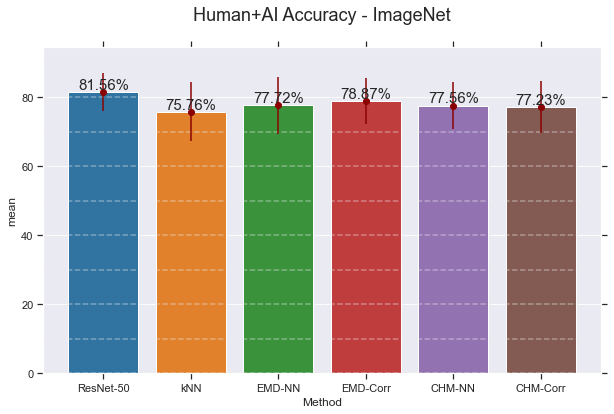

In [57]:
fig, ax = plt.subplots(1, figsize=(10, 6))

sns.barplot(data=accuracy_df, x='Method', y='mean', ax=ax, palette="tab10")

for container in ax.containers:
  ax.bar_label(container, fontsize=15, fmt='%.2f%%')
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title(f'Human+AI Accuracy - {DATA_SET}\n', fontsize=18)
plt.errorbar(accuracy_df['Method'], accuracy_df['mean'], yerr=accuracy_df['std'], fmt="o", color="darkred")
plt.show()

# Confusing and Easy samples for Human

## Confusing

In [58]:
tmp = df.groupby(['Query'])['Correctness'].agg(['mean', 'count']).reset_index().sort_values(['mean', 'count'], ascending=[True, False])
# tmp = tmp[(tmp['count'] > 2) & (tmp['mean'] < 0.25)]  
tmp = tmp[ (tmp['mean'] < 0.25)]  
confusing_queries = tmp.sort_values(['mean', 'count'], ascending=[True, False])['Query'].values

In [59]:
confusing_df = df[df['Query'].isin(confusing_queries)]

## Easy ones

In [60]:
tmp = df.groupby(['Query'])['Correctness'].agg(['mean', 'count']).reset_index().sort_values(['mean', 'count'], ascending=[True, False])
# tmp = tmp[(tmp['count'] > 2) & (tmp['mean'] > 0.9)]  
tmp = tmp[(tmp['mean'] > 0.9)]  
easy_queries = tmp.sort_values(['mean', 'count'], ascending=[True, False])['Query'].values

In [61]:
easy_df = df[df['Query'].isin(easy_queries)]

## Middle One

In [62]:
tmp = df.groupby(['Query'])['Correctness'].agg(['mean', 'count']).reset_index().sort_values(['mean', 'count'], ascending=[True, False])
tmp = tmp[ (tmp['mean'] < 0.6) & (tmp['mean'] > 0.4) ]  
middle_queries = tmp.sort_values(['mean', 'count'], ascending=[True, False])['Query'].values

In [63]:
middle_df = df[df['Query'].isin(middle_queries)]

## Plot Parents

In [64]:
captilized_parent = [x.replace('_', ' ').title() for x in copy.deepcopy(confusing_df['Parent-lvl12'].values)]
confusing_df['Parent-lvl12'] = captilized_parent

/tmp/ipykernel_2123453/3990962900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confusing_df['Parent-lvl12'] = captilized_parent


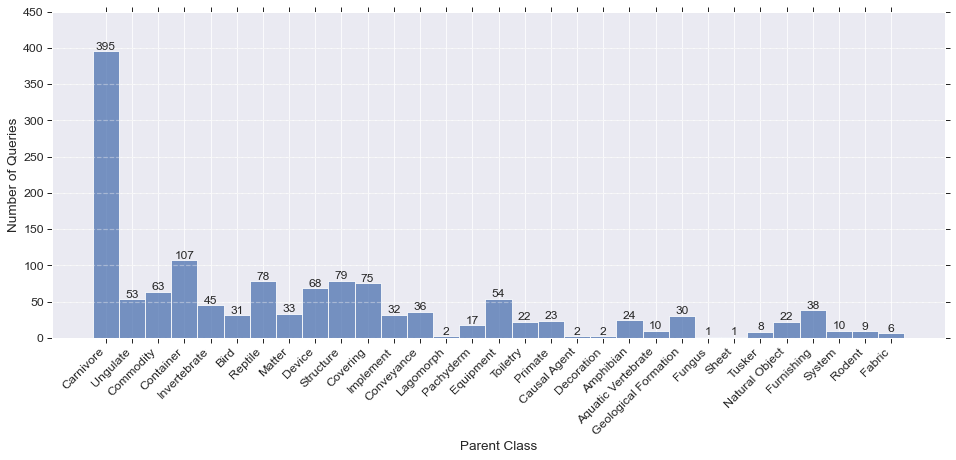

In [65]:
with sns.plotting_context('paper', font_scale = 1.4):
  fig, ax = plt.subplots(1, figsize=(16, 6))
  sns.histplot(data=confusing_df, x='Parent-lvl12', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=12)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # plt.xticks(rotation = 65)
  plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

  # plt.title('HIDE THIS FOR PAPER: Parent Category (lvl 12)  Confusing (>2 Users, Mean Acc <0.25)\n', fontsize=16)
  plt.ylim(0, 450)

  ax.set_xlabel('Parent Class')
  ax.set_ylabel('Number of Queries')

  new_tick_labels = [x.get_text().replace('_', ' ') .title() for x in ax.get_xticklabels()]
  plt.savefig(f'../plots/human-study-main-results/ImageNet-ConfusingQueries-Parent.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [66]:
confusing_df.groupby('Parent-lvl12')['Real GTs']

In [67]:
confusing_df.groupby(['Method'])['UID'].count().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,UID
4,ResNet-50,154
5,kNN,274
3,EMD-NN,236
2,EMD-Corr,242
1,CHM-NN,238
0,CHM-Corr,232


In [68]:
confusing_df['Real WNIDs LEN'] = [len(x) for x in confusing_df['Real WNIDs'].values]

/tmp/ipykernel_2123453/1541866592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confusing_df['Real WNIDs LEN'] = [len(x) for x in confusing_df['Real WNIDs'].values]


In [69]:
confusing_df_ones = confusing_df[confusing_df['Real WNIDs LEN'] == 13]

In [70]:
confusing_df_ones['parent_parsed'] = [ast.literal_eval(x)[0] for x in confusing_df_ones['Parent-lvl12_real'].values]

/tmp/ipykernel_2123453/3843003118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confusing_df_ones['parent_parsed'] = [ast.literal_eval(x)[0] for x in confusing_df_ones['Parent-lvl12_real'].values]


In [71]:
confusing_df_ones.head()

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real,Real WNIDs LEN,parent_parsed
2400,6385946,ILSVRC2012_val_00018071.JPEG,0,18,18,6,344372.7,343350,2022-05-01 00:07:59.983,10,0,24,0,0.8,24,ResNet-50,n02105251,Carnivore,canine,dog,0,Medium,0.57,Irish_terrier,Border_terrier,Border_terrier,Irish_terrier,0.57,0.5,0.45,0.55,['Border_terrier'],['n02093754'],['carnivore'],['canine'],['dog'],13,carnivore
2418,6385946,ILSVRC2012_val_00031856.JPEG,0,18,18,6,344372.7,343350,2022-05-01 00:07:59.983,10,0,24,0,0.8,24,ResNet-50,n02097130,Carnivore,canine,dog,0,Medium,0.58,giant_schnauzer,giant_schnauzer,giant_schnauzer,giant_schnauzer,0.58,0.8,0.70,0.65,['Scotch_terrier'],['n02097298'],['carnivore'],['canine'],['dog'],13,carnivore
2367,6385940,ILSVRC2012_val_00005960.JPEG,1,9,20,4,328655.1,327417,2022-05-01 00:07:27.204,10,0,24,0,0.8,24,ResNet-50,n02437616,Ungulate,ungulate,ungulate,1,Medium,0.74,llama,llama,llama,llama,0.74,0.6,0.70,0.55,['llama'],['n02437616'],['ungulate'],['ungulate'],['ungulate'],13,ungulate
2386,6385941,ILSVRC2012_val_00048771.JPEG,1,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,0,0.8,24,ResNet-50,n02412080,Ungulate,ungulate,ungulate,0,Easy,0.33,ram,ram,ram,bighorn,0.33,0.4,0.25,0.30,['bighorn'],['n02415577'],['ungulate'],['ungulate'],['ungulate'],13,ungulate
2387,6385941,ILSVRC2012_val_00049264.JPEG,1,17,19,5,317225.0,315446,2022-05-01 00:06:54.326,10,0,24,0,0.8,24,ResNet-50,n04350905,Commodity,commodity,commodity,0,Hard,0.93,suit,suit,suit,suit,0.93,0.9,0.90,1.00,['miniskirt'],['n03770439'],['commodity'],['commodity'],['commodity'],13,commodity


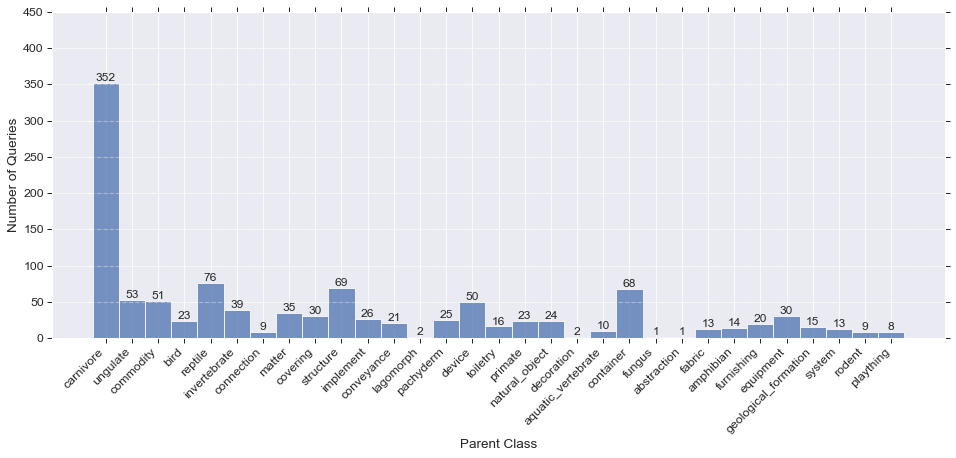

In [72]:
with sns.plotting_context('paper', font_scale = 1.4):
  fig, ax = plt.subplots(1, figsize=(16, 6))
  sns.histplot(data=confusing_df_ones, x='parent_parsed', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=12)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # plt.xticks(rotation = 65)
  plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

  # plt.title('HIDE THIS FOR PAPER: Parent Category (lvl 12)  Confusing (>2 Users, Mean Acc <0.25)\n', fontsize=16)
  plt.ylim(0, 450)

  ax.set_xlabel('Parent Class')
  ax.set_ylabel('Number of Queries')

  new_tick_labels = [x.get_text().replace('_', ' ') .title() for x in ax.get_xticklabels()]
  plt.savefig(f'../plots/human-study-main-results/ImageNet-ConfusingQueries-Parent-REAL.pdf', dpi=100, bbox_inches='tight')
  plt.show()

In [73]:
confusing_df_ones[confusing_df_ones['parent_parsed']=='carnivore'].groupby(['Method'])['UID'].count().reset_index().sort_values(by='Method', key=lambda x: x.map(ORDER_DICT))

,Method,UID
4,ResNet-50,39
5,kNN,67
3,EMD-NN,60
2,EMD-Corr,62
1,CHM-NN,62
0,CHM-Corr,62


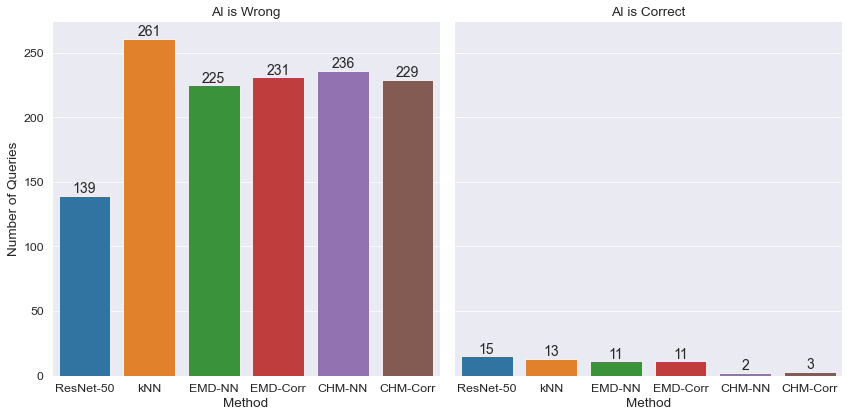

In [74]:
with sns.plotting_context('paper', font_scale = 1.4):
  g = sns.FacetGrid(confusing_df.groupby(['Method', 'ClassifierCorrectness'])['UID'].count().reset_index(), col="ClassifierCorrectness", height=6)
  g.map(sns.barplot, "Method", "UID", order=df.Method.unique(), palette="tab10")

  # [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

  for ax in g.axes.flat:
    for container in ax.containers:
      ax.bar_label(container, fontsize=14)

  axes = g.axes.flatten()
  axes[0].set_title('AI is Wrong')
  axes[1].set_title('AI is Correct')
  axes[0].set_ylabel('Number of Queries')
  plt.savefig(f'../plots/human-study-main-results/ImageNet-ConfusingQueries.pdf', dpi=100, bbox_inches='tight')
  plt.show()

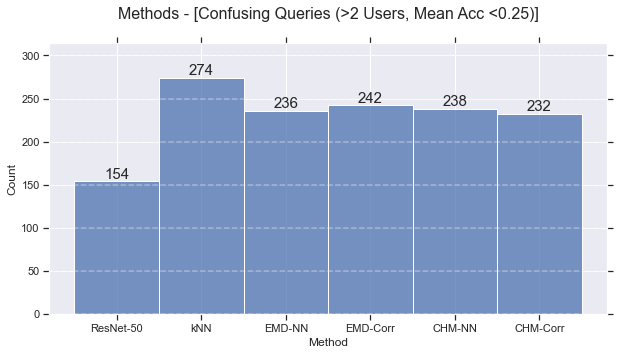

In [75]:
fig, ax = plt.subplots(1, figsize=(10,5))
sns.histplot(data=confusing_df, x='Method', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title('Methods - [Confusing Queries (>2 Users, Mean Acc <0.25)]\n', fontsize=16)
plt.show()

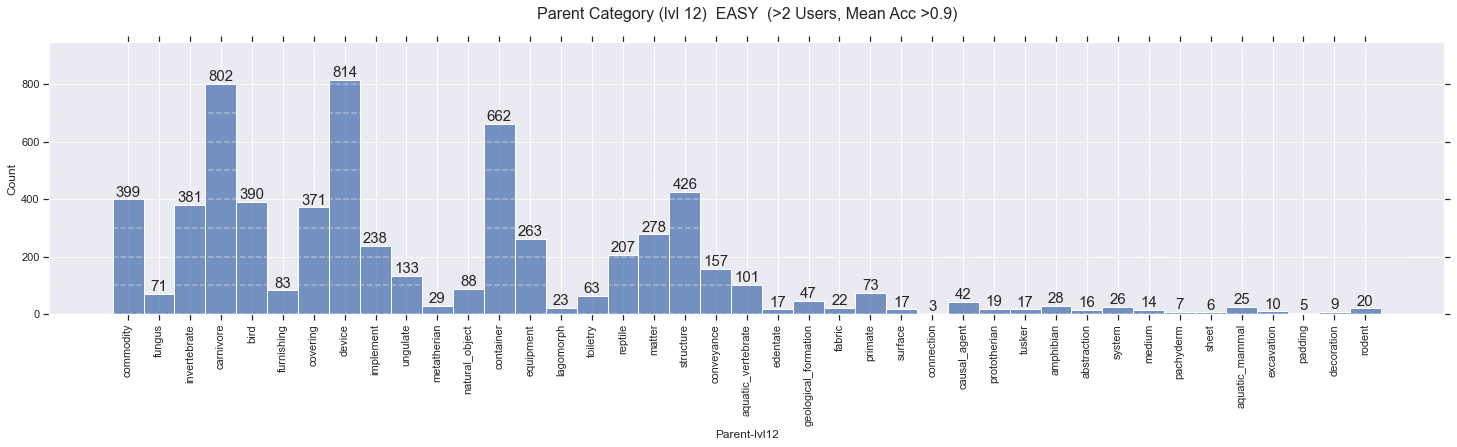

In [76]:
fig, ax = plt.subplots(1, figsize=(25,5))
sns.histplot(data=easy_df, x='Parent-lvl12', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.xticks(rotation = 90)
plt.title('Parent Category (lvl 12)  EASY  (>2 Users, Mean Acc >0.9)\n', fontsize=16)
plt.show()

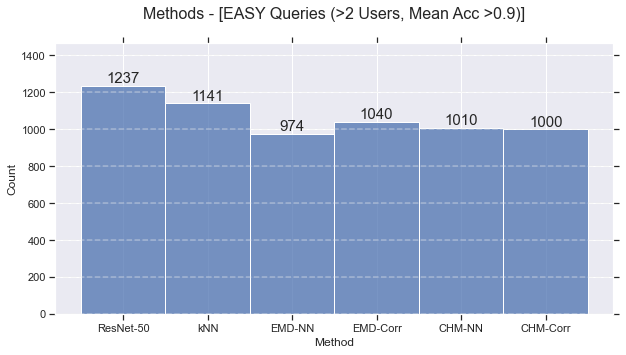

In [77]:
fig, ax = plt.subplots(1, figsize=(10,5))
sns.histplot(data=easy_df, x='Method', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title('Methods - [EASY Queries (>2 Users, Mean Acc >0.9)]\n', fontsize=16)
plt.show()

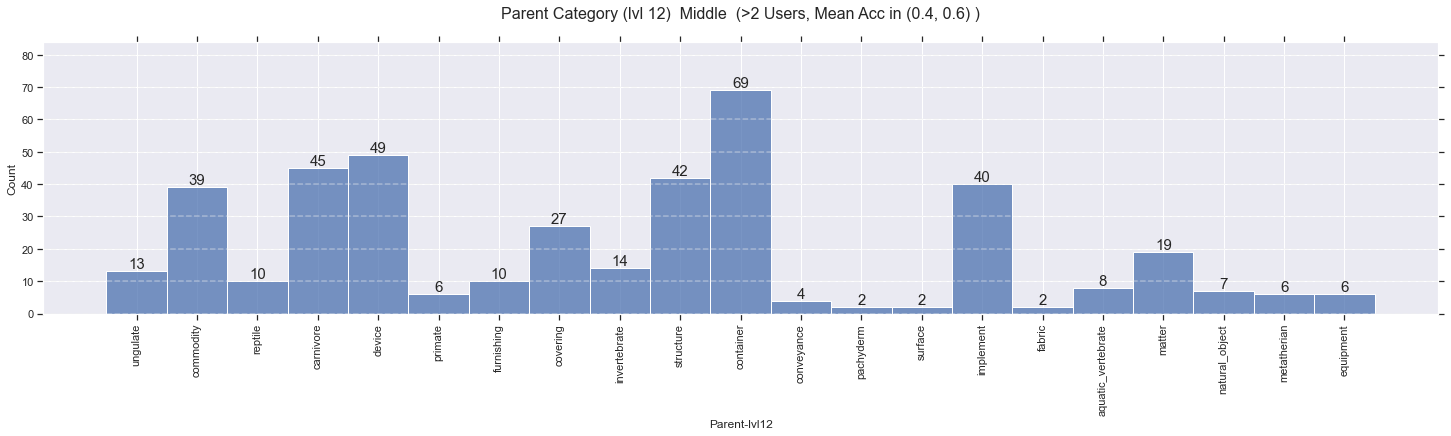

In [78]:
fig, ax = plt.subplots(1, figsize=(25,5))
sns.histplot(data=middle_df, x='Parent-lvl12', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.xticks(rotation = 90)
plt.title('Parent Category (lvl 12)  Middle  (>2 Users, Mean Acc in (0.4, 0.6) )\n', fontsize=16)
plt.show()

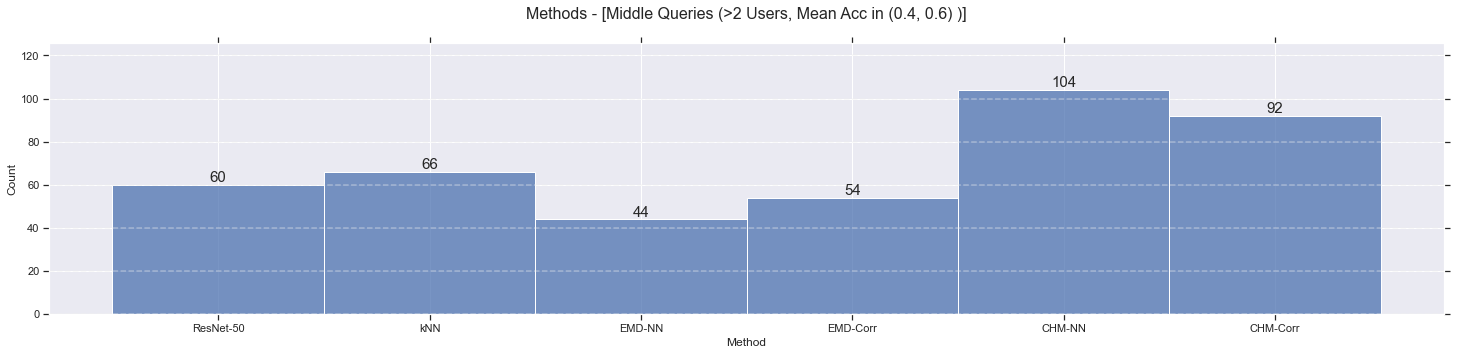

In [79]:
fig, ax = plt.subplots(1, figsize=(25,5))
sns.histplot(data=middle_df, x='Method', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title('Methods - [Middle Queries (>2 Users, Mean Acc in (0.4, 0.6) )]\n', fontsize=16)
plt.show()

## Custom

In [80]:
tmp = df.groupby(['Query'])['Correctness'].agg(['mean', 'count']).reset_index().sort_values(['mean', 'count'], ascending=[True, False])
tmp = tmp[(tmp['count'] > 2) ]  
custom_range = tmp.sort_values(['mean', 'count'], ascending=[True, False])['Query'].values

In [81]:
custom_df = df[df['Query'].isin(custom_range)]

In [82]:
custom_df.groupby('Method')['UID'].count()

Method
CHM-Corr     1770
CHM-NN       1800
EMD-Corr     1770
EMD-NN       1710
ResNet-50    1580
kNN          1566
Name: UID, dtype: int64

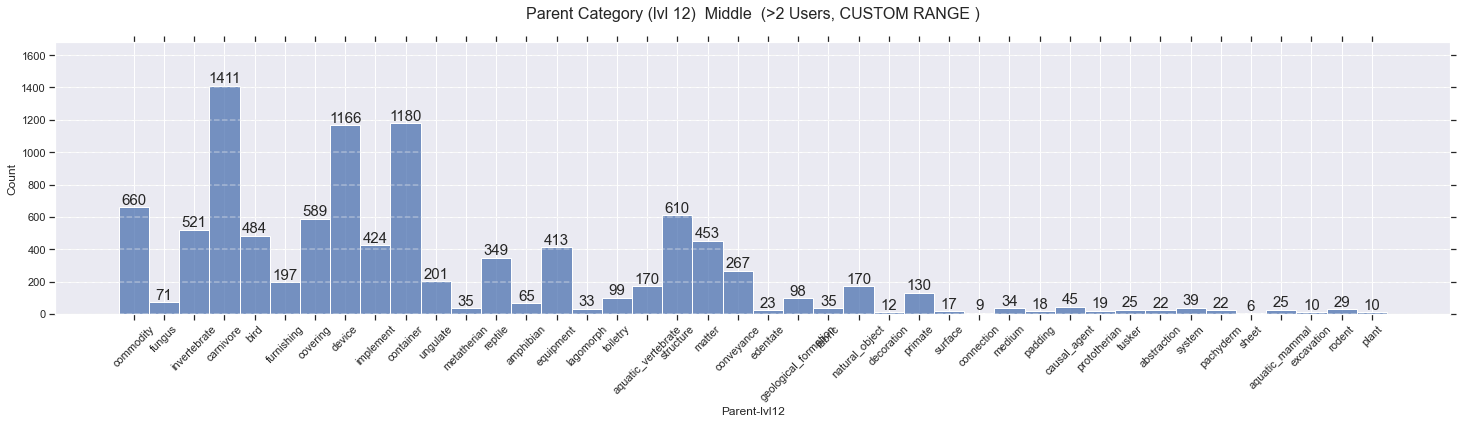

In [83]:
fig, ax = plt.subplots(1, figsize=(25,5))
sns.histplot(data=custom_df, x='Parent-lvl12', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.xticks(rotation = 45)
plt.title('Parent Category (lvl 12)  Middle  (>2 Users, CUSTOM RANGE )\n', fontsize=16)
plt.show()

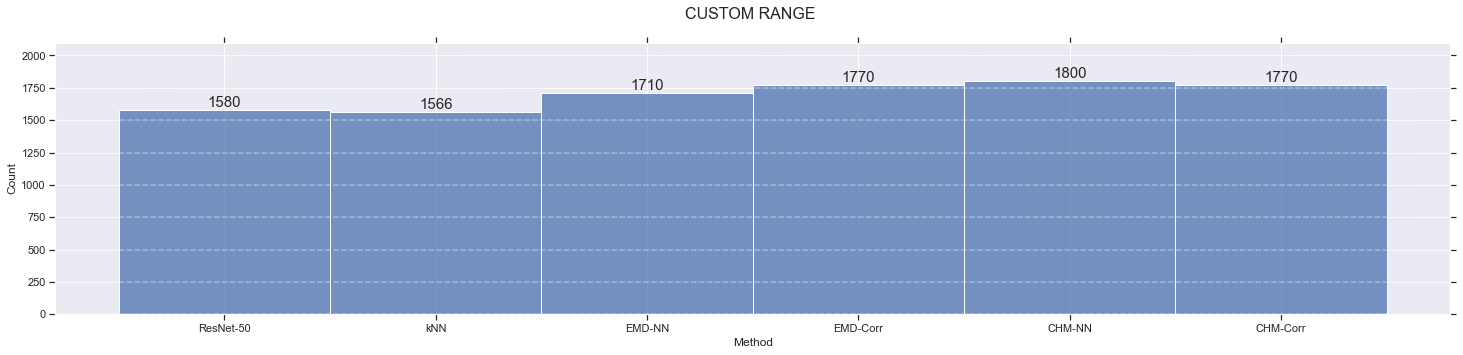

In [84]:
fig, ax = plt.subplots(1, figsize=(25,5))
sns.histplot(data=custom_df, x='Method', ax=ax)

for container in ax.containers:
  ax.bar_label(container, fontsize=15)
    
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
  ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.title('CUSTOM RANGE \n', fontsize=16)
plt.show()

# Plot Different XAIs

In [57]:
import torchvision.transforms as transforms
from PIL import Image
import json

display_transform  = transforms.Compose([transforms.Resize(256), transforms.CenterCrop((224, 224))])

In [58]:
MethodKeyMapper = {
  'ResNet-50': 0,
  'kNN': 1,
  'EMD-NN':  2,
  'EMD-Corr': 2,
  'CHM-NN': 3,
  'CHM-Corr': 3
}

## ResNet vs Others

In [59]:
VisualizationsKeyMapper = {
  'ResNet-50': 'HS_No_XAI',
  'kNN':      'HS_KNNs',
  'EMD-NN':    'HS_EMD_NNs',
  'EMD-Corr':  'HS_EMD_Corrs',
  'CHM-NN':    'HS_CHM_NNs',
  'CHM-Corr':  'HS_CHM_Corrs'
}

In [60]:
Pairs = [['ResNet-50', 'kNN'], 
         ['ResNet-50', 'EMD-NN'],
         ['ResNet-50', 'EMD-Corr'], 
         ['ResNet-50', 'CHM-NN'],
         ['ResNet-50', 'CHM-Corr'],
        ]         

# Pairs = [['ResNet-50', 'kNN'], 
        # ]         

In [61]:
df.groupby('Query')[['Query', 'Method', 'Correctness', 'ClassifierCorrectness']].filter(lambda x: True).head(2)

,Query,Method,Correctness,ClassifierCorrectness
3524,ILSVRC2012_val_00016004.JPEG,ResNet-50,1,1
2394,ILSVRC2012_val_00000304.JPEG,ResNet-50,1,1


In [62]:
def plot_parents(data, pair):
  fig, ax = plt.subplots(1, figsize=(12,5))
  sns.histplot(data=data, x='Parent-lvl12', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  plt.title(pair)
  plt.show()

In [63]:
def plot_queries(df_shared, pair):
  pp = PdfPages(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}.pdf')

  os.makedirs(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/', exist_ok=True)
  
  for i, row in df_shared.groupby(['ClassifierCorrectness', 'Query', 'Method'])[['Correctness']].agg(['mean', 'count']).unstack().reset_index().dropna().iterrows():
    # print(row)
    fig, axes = plt.subplots(1, 3, figsize=(25, 5), gridspec_kw={'width_ratios': [0.01, 4, 16]}, facecolor=(1,1,1))
    axes[0].set_axis_off()
    axes[1].set_axis_off()
    axes[2].set_axis_off()

    q = row.reset_index()[i][1]
    real_gts = df.loc[df['Query'] == q].iloc[0]['Real GTs']

    Method_Predictions = {}
    Method_Predictions[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Prediction']
    Method_Predictions[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Prediction']
    Method_Predictions[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Prediction']
    Method_Predictions[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Prediction']

    Method_Confidences = {}
    Method_Confidences[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Conf']
    Method_Confidences[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Conf']
    Method_Confidences[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Conf']
    Method_Confidences[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Conf']

    m1_count = row.reset_index()[i][5] 
    m1_mean  = row.reset_index()[i][3] 
    m2_count = row.reset_index()[i][4] 
    m2_mean  = row.reset_index()[i][2] 

    m1_name = row['Correctness'].reset_index()['Method'][1]
    m2_name = row['Correctness'].reset_index()['Method'][0]


    m1_color = 'yellow'
    m2_color = 'yellow'

    if m1_mean>m2_mean:
      m1_color = 'green'
      m2_color = 'red'
    elif  m1_mean<m2_mean:
      m1_color = 'red'
      m2_color = 'green'
    else:
      m1_color = 'green'
      m2_color = 'green'

    axes[1].text(0, 0.9, f"{m1_name} Users: {int(m1_count)}" ,fontsize=16)
    axes[1].text(0, 0.8, f"{m2_name} Users: {int(m2_count)}" ,fontsize=16)
    axes[1].text(0, 0.6, f"{m1_name} Human Accuracy: {100*m1_mean:.1f}%" ,fontsize=16, color=m1_color)
    axes[1].text(0, 0.5, f"{m2_name} Human Accuracy: {100*m2_mean:.1f}%" ,fontsize=16, color=m2_color)
    str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts)])
    axes[1].text(0, 0.05, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')

    m1_pred = Method_Predictions[MethodKeyMapper[m1_name]]
    m1_conf = Method_Confidences[MethodKeyMapper[m1_name]]

    m2_pred = Method_Predictions[MethodKeyMapper[m2_name]]
    m2_conf = Method_Confidences[MethodKeyMapper[m2_name]]

    m1_color = 'black'
    if m1_pred in real_gts:
      m1_color = 'green'
    else:
      m1_color = 'red'

    m2_color = 'black'
    if m2_pred in real_gts:
      m2_color = 'green'
    else:
      m2_color = 'red'

    axes[1].text(0, 0.3, f"{m1_name} output: {m1_pred.replace('_', ' ').title()}" ,fontsize=18, color=m1_color)
    axes[1].text(0, 0.2, f"{m2_name} output: {m2_pred.replace('_', ' ').title()}" ,fontsize=18, color=m2_color)

    # axes[0].imshow(Image.open(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}'))
    axes[2].imshow(Image.open(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[pair[1]]}/{q}'))
    fig.savefig(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/{i}.pdf' ,dpi=100, bbox_inches='tight')
    pp.savefig(fig)
    plt.close()

  pp.close()

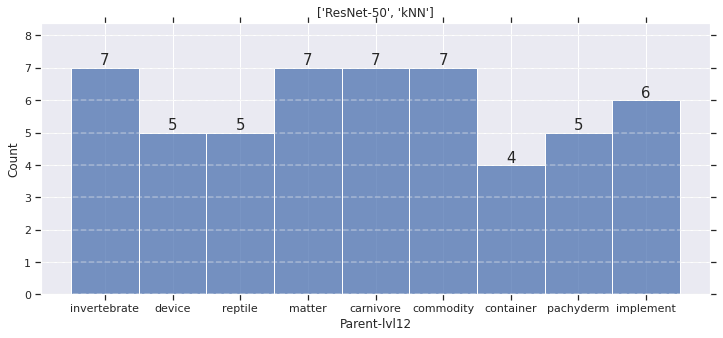

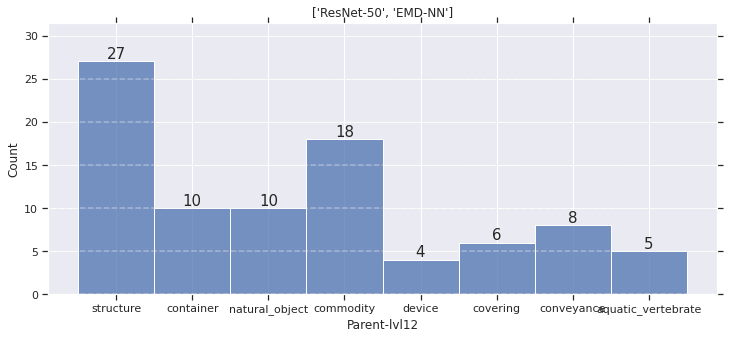

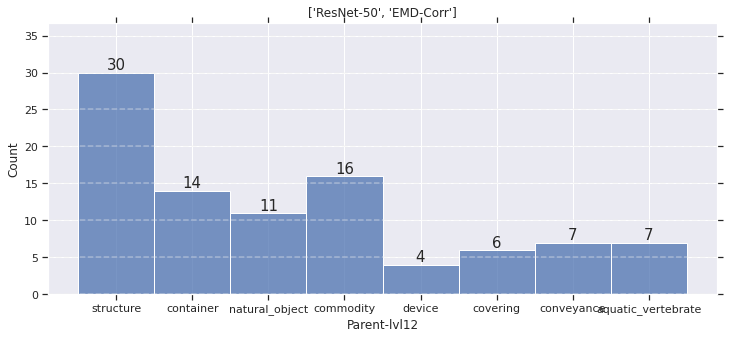

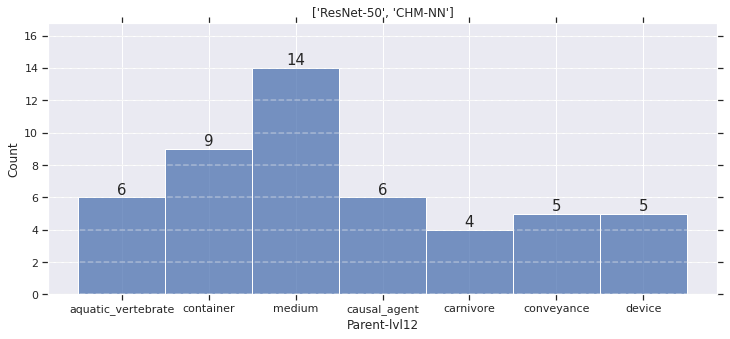

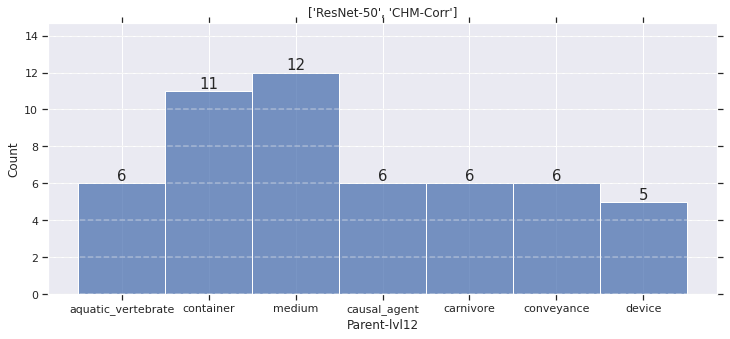

In [64]:
for method_pair in Pairs:
  common_qs = df[df.Method.isin(method_pair)].groupby(['Query', 'Method'])[['Correctness']].count().unstack().dropna().stack().reset_index()['Query']
  df_shared = df[(df['Query'].isin(common_qs)) & df.Method.isin(method_pair)]
  plot_parents(df_shared, method_pair)
  plot_queries(df_shared, method_pair)

## kNN vs Other NNs

In [65]:
VisualizationsKeyMapper = {
  'ResNet-50': 'HS_No_XAI',
  'kNN':      'HS_KNNs',
  'EMD-NN':    'HS_EMD_NNs',
  'EMD-Corr':  'HS_EMD_Corrs',
  'CHM-NN':    'HS_CHM_NNs',
  'CHM-Corr':  'HS_CHM_Corrs'
}

In [66]:
Pairs = [['kNN', 'EMD-NN'],
         ['kNN', 'CHM-NN'],
        ]         

In [67]:
df.groupby('Query')[['Query', 'Method', 'Correctness', 'ClassifierCorrectness']].filter(lambda x: True).head(2)

,Query,Method,Correctness,ClassifierCorrectness
3524,ILSVRC2012_val_00016004.JPEG,ResNet-50,1,1
2394,ILSVRC2012_val_00000304.JPEG,ResNet-50,1,1


In [68]:
def plot_parents(data, pair):
  fig, ax = plt.subplots(1, figsize=(12,5))
  sns.histplot(data=data, x='Parent-lvl12', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  plt.title(pair)
  plt.show()

In [69]:
def plot_queries(df_shared, pair):
  pp = PdfPages(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}.pdf')
  os.makedirs(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/', exist_ok=True)
  for i, row in df_shared.groupby(['ClassifierCorrectness', 'Query', 'Method'])[['Correctness']].agg(['mean', 'count']).unstack().reset_index().dropna().iterrows():
  
    fig, axes = plt.subplots(2, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [5, 15]}, facecolor=(1,1,1))

    ax0 = axes[0][0]
    ax1 = axes[1][0]
    ax2 = axes[0][1]
    ax3 = axes[1][1]

    for T in range(2):
      for K in range(2):
        axes[T][K].set_axis_off()

    q = row.reset_index()[i][1]
    real_gts = df.loc[df['Query'] == q].iloc[0]['Real GTs']

    Method_Predictions = {}
    Method_Predictions[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Prediction']
    Method_Predictions[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Prediction']
    Method_Predictions[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Prediction']
    Method_Predictions[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Prediction']

    Method_Confidences = {}
    Method_Confidences[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Conf']
    Method_Confidences[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Conf']
    Method_Confidences[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Conf']
    Method_Confidences[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Conf']

    m1_count = row.reset_index()[i][5] 
    m1_mean  = row.reset_index()[i][3] 
    m2_count = row.reset_index()[i][4] 
    m2_mean  = row.reset_index()[i][2] 

    m1_name = row['Correctness'].reset_index()['Method'][1]
    m2_name = row['Correctness'].reset_index()['Method'][0]


    m1_color = 'yellow'
    m2_color = 'yellow'

    if m1_mean>m2_mean:
      m1_color = 'green'
      m2_color = 'red'
    elif  m1_mean<m2_mean:
      m1_color = 'red'
      m2_color = 'green'
    else:
      m1_color = 'green'
      m2_color = 'green'

    ax1.text(0.15, 0.9, f"{m1_name} Users: {int(m1_count)}" ,fontsize=16)
    ax1.text(0.15, 0.8, f"{m2_name} Users: {int(m2_count)}" ,fontsize=16)
    ax1.text(0.15, 0.6, f"{m1_name} Human Accuracy: {100*m1_mean:.1f}%" ,fontsize=16, color=m1_color)
    ax1.text(0.15, 0.5, f"{m2_name} Human Accuracy: {100*m2_mean:.1f}%" ,fontsize=16, color=m2_color)
    str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts)])
    ax1.text(0.15, 0.05, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')

    m1_pred = Method_Predictions[MethodKeyMapper[m1_name]]
    m1_conf = Method_Confidences[MethodKeyMapper[m1_name]]

    m2_pred = Method_Predictions[MethodKeyMapper[m2_name]]
    m2_conf = Method_Confidences[MethodKeyMapper[m2_name]]

    m1_color = 'black'
    if m1_pred in real_gts:
      m1_color = 'green'
    else:
      m1_color = 'red'

    m2_color = 'black'
    if m2_pred in real_gts:
      m2_color = 'green'
    else:
      m2_color = 'red'

    ax1.text(0.15, 0.3, f"{m1_name} output: {m1_pred.replace('_', ' ').title()}" ,fontsize=18, color=m1_color)
    ax1.text(0.15, 0.2, f"{m2_name} output: {m2_pred.replace('_', ' ').title()}" ,fontsize=18, color=m2_color)

    ax2.set_title(m1_name, fontsize=15)
    ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}', 510,0,0,0))
    ax3.set_title(m2_name, fontsize=15)
    ax3.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m2_name]}/{q}', 510,0,0,0))

    ax0.set_title('Query', fontsize=15)
    ax0.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}', 0,0,2125,0))
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.savefig(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/{i}.pdf' ,dpi=100, bbox_inches='tight')
    pp.savefig(fig)
    plt.close()
  
  pp.close()

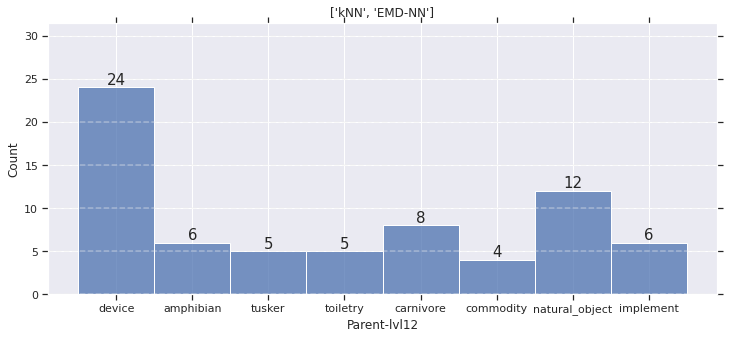

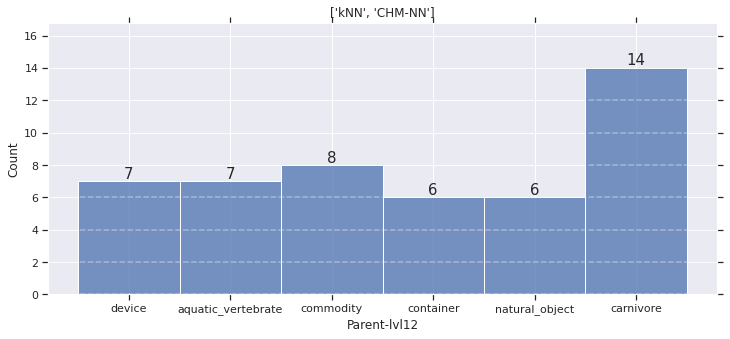

In [70]:
for method_pair in Pairs:
  common_qs = df[df.Method.isin(method_pair)].groupby(['Query', 'Method'])[['Correctness']].count().unstack().dropna().stack().reset_index()['Query']
  df_shared = df[(df['Query'].isin(common_qs)) & df.Method.isin(method_pair)]
  plot_parents(df_shared, method_pair)
  plot_queries(df_shared, method_pair)

## CHM Corrs vs CHM Corrs

In [71]:
Pairs = [['EMD-Corr', 'CHM-Corr']]         

In [72]:
df.groupby('Query')[['Query', 'Method', 'Correctness', 'ClassifierCorrectness']].filter(lambda x: True).head(2)

,Query,Method,Correctness,ClassifierCorrectness
3524,ILSVRC2012_val_00016004.JPEG,ResNet-50,1,1
2394,ILSVRC2012_val_00000304.JPEG,ResNet-50,1,1


In [73]:
def plot_parents(data, pair):
  fig, ax = plt.subplots(1, figsize=(12,5))
  sns.histplot(data=data, x='Parent-lvl12', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  plt.title(pair)
  plt.show()

In [74]:
def plot_queries(df_shared, pair):
  pp = PdfPages(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}.pdf')
  os.makedirs(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/', exist_ok=True)
  for i, row in df_shared.groupby(['ClassifierCorrectness', 'Query', 'Method'])[['Correctness']].agg(['mean', 'count']).unstack().reset_index().dropna().iterrows():
  
    fig, axes = plt.subplots(2, 2, figsize=(25, 15), gridspec_kw={'width_ratios': [5, 30]}, facecolor=(1,1,1))

    ax0 = axes[0][0]
    ax1 = axes[1][0]
    ax2 = axes[0][1]
    ax3 = axes[1][1]

    for T in range(2):
      for K in range(2):
        axes[T][K].set_axis_off()

    q = row.reset_index()[i][1]
    real_gts = df.loc[df['Query'] == q].iloc[0]['Real GTs']

    Method_Predictions = {}
    Method_Predictions[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Prediction']
    Method_Predictions[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Prediction']
    Method_Predictions[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Prediction']
    Method_Predictions[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Prediction']

    Method_Confidences = {}
    Method_Confidences[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Conf']
    Method_Confidences[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Conf']
    Method_Confidences[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Conf']
    Method_Confidences[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Conf']

    m1_count = row.reset_index()[i][5] 
    m1_mean  = row.reset_index()[i][3] 
    m2_count = row.reset_index()[i][4] 
    m2_mean  = row.reset_index()[i][2] 

    m1_name = row['Correctness'].reset_index()['Method'][1]
    m2_name = row['Correctness'].reset_index()['Method'][0]


    m1_color = 'yellow'
    m2_color = 'yellow'

    if m1_mean>m2_mean:
      m1_color = 'green'
      m2_color = 'red'
    elif  m1_mean<m2_mean:
      m1_color = 'red'
      m2_color = 'green'
    else:
      m1_color = 'green'
      m2_color = 'green'

    ax1.text(0.05, 0.9, f"{m1_name} Users: {int(m1_count)}" ,fontsize=16)
    ax1.text(0.05, 0.8, f"{m2_name} Users: {int(m2_count)}" ,fontsize=16)
    ax1.text(0.05, 0.6, f"{m1_name} Human Accuracy: {100*m1_mean:.1f}%" ,fontsize=16, color=m1_color)
    ax1.text(0.05, 0.5, f"{m2_name} Human Accuracy: {100*m2_mean:.1f}%" ,fontsize=16, color=m2_color)
    str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts)])
    ax1.text(0.05, 0.05, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')

    m1_pred = Method_Predictions[MethodKeyMapper[m1_name]]
    m1_conf = Method_Confidences[MethodKeyMapper[m1_name]]

    m2_pred = Method_Predictions[MethodKeyMapper[m2_name]]
    m2_conf = Method_Confidences[MethodKeyMapper[m2_name]]

    m1_color = 'black'
    if m1_pred in real_gts:
      m1_color = 'green'
    else:
      m1_color = 'red'

    m2_color = 'black'
    if m2_pred in real_gts:
      m2_color = 'green'
    else:
      m2_color = 'red'

    ax1.text(0.05, 0.3, f"{m1_name} output: {m1_pred.replace('_', ' ').title()}" ,fontsize=18, color=m1_color)
    ax1.text(0.05, 0.2, f"{m2_name} output: {m2_pred.replace('_', ' ').title()}" ,fontsize=18, color=m2_color)

    ax2.set_title(m1_name, fontsize=15)
    ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}', 510,0,0,0))
    ax3.set_title(m2_name, fontsize=15)
    ax3.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m2_name]}/{q}', 510,0,0,0))
    ax0.set_title('Query', fontsize=15)
    ax0.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}', 0,0,2150,400))

    plt.subplots_adjust(wspace=0.025, hspace=0.1)
    
    fig.savefig(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/{i}.pdf' ,dpi=100, bbox_inches='tight')
    pp.savefig(fig)
    plt.close()
  
  pp.close()

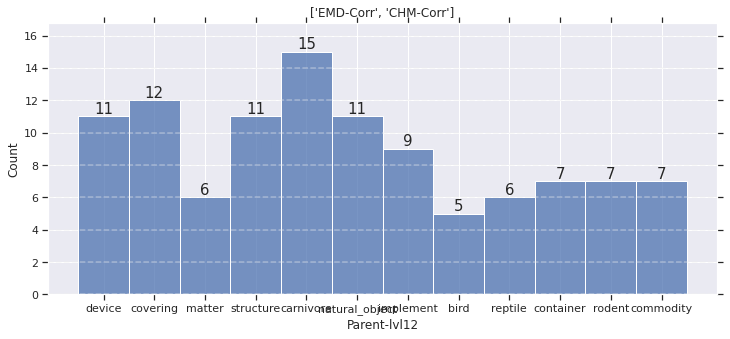

In [75]:
for method_pair in Pairs:
  common_qs = df[df.Method.isin(method_pair)].groupby(['Query', 'Method'])[['Correctness']].count().unstack().dropna().stack().reset_index()['Query']
  df_shared = df[(df['Query'].isin(common_qs)) & df.Method.isin(method_pair)]
  plot_parents(df_shared, method_pair)
  plot_queries(df_shared, method_pair)
  # break

## NNs vs Corrs vs Corrs

In [76]:
Pairs = [['kNN', 'EMD-Corr'],
         ['kNN', 'CHM-Corr']]         

In [77]:
df.groupby('Query')[['Query', 'Method', 'Correctness', 'ClassifierCorrectness']].filter(lambda x: True).head(2)

,Query,Method,Correctness,ClassifierCorrectness
3524,ILSVRC2012_val_00016004.JPEG,ResNet-50,1,1
2394,ILSVRC2012_val_00000304.JPEG,ResNet-50,1,1


In [78]:
def plot_parents(data, pair):
  fig, ax = plt.subplots(1, figsize=(12,5))
  sns.histplot(data=data, x='Parent-lvl12', ax=ax)

  for container in ax.containers:
    ax.bar_label(container, fontsize=15)

  ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw horizontal axis lines
  vals = ax.get_yticks()
  for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  plt.title(pair)
  plt.show()

In [79]:
def plot_queries(df_shared, pair):
  pp = PdfPages(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}.pdf')
  os.makedirs(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/', exist_ok=True)
  for i, row in df_shared.groupby(['ClassifierCorrectness', 'Query', 'Method'])[['Correctness']].agg(['mean', 'count']).unstack().reset_index().dropna().iterrows():
  
    fig, axes = plt.subplots(2, 2, figsize=(25, 10), gridspec_kw={'width_ratios': [5, 15],'height_ratios': [1,1.95]}, facecolor=(1,1,1))

    ax0 = axes[0][0]
    ax1 = axes[1][0]
    ax2 = axes[0][1]
    ax3 = axes[1][1]

    for T in range(2):
      for K in range(2):
        axes[T][K].set_axis_off()

    q = row.reset_index()[i][1]
    real_gts = df.loc[df['Query'] == q].iloc[0]['Real GTs']

    Method_Predictions = {}
    Method_Predictions[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Prediction']
    Method_Predictions[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Prediction']
    Method_Predictions[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Prediction']
    Method_Predictions[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Prediction']

    Method_Confidences = {}
    Method_Confidences[0] = df.loc[df['Query'] == q].iloc[0]['ResNet-Conf']
    Method_Confidences[1] = df.loc[df['Query'] == q].iloc[0]['KNN-Conf']
    Method_Confidences[2] = df.loc[df['Query'] == q].iloc[0]['EMD-Conf']
    Method_Confidences[3] = df.loc[df['Query'] == q].iloc[0]['CHM-Conf']

    m1_count = row.reset_index()[i][5] 
    m1_mean  = row.reset_index()[i][3] 
    m2_count = row.reset_index()[i][4] 
    m2_mean  = row.reset_index()[i][2] 

    m1_name = row['Correctness'].reset_index()['Method'][1]
    m2_name = row['Correctness'].reset_index()['Method'][0]


    m1_color = 'yellow'
    m2_color = 'yellow'

    if m1_mean>m2_mean:
      m1_color = 'green'
      m2_color = 'red'
    elif  m1_mean<m2_mean:
      m1_color = 'red'
      m2_color = 'green'
    else:
      m1_color = 'green'
      m2_color = 'green'

    ax1.text(0.25, 0.9, f"{m1_name} Users: {int(m1_count)}" ,fontsize=16)
    ax1.text(0.25, 0.8, f"{m2_name} Users: {int(m2_count)}" ,fontsize=16)
    ax1.text(0.25, 0.6, f"{m1_name} Human Accuracy: {100*m1_mean:.1f}%" ,fontsize=16, color=m1_color)
    ax1.text(0.25, 0.5, f"{m2_name} Human Accuracy: {100*m2_mean:.1f}%" ,fontsize=16, color=m2_color)
    str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts)])
    ax1.text(0.25, 0.05, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')

    m1_pred = Method_Predictions[MethodKeyMapper[m1_name]]
    m1_conf = Method_Confidences[MethodKeyMapper[m1_name]]

    m2_pred = Method_Predictions[MethodKeyMapper[m2_name]]
    m2_conf = Method_Confidences[MethodKeyMapper[m2_name]]

    m1_color = 'black'
    if m1_pred in real_gts:
      m1_color = 'green'
    else:
      m1_color = 'red'

    m2_color = 'black'
    if m2_pred in real_gts:
      m2_color = 'green'
    else:
      m2_color = 'red'

    ax1.text(0.25, 0.3, f"{m1_name} output: {m1_pred.replace('_', ' ').title()}" ,fontsize=18, color=m1_color)
    ax1.text(0.25, 0.2, f"{m2_name} output: {m2_pred.replace('_', ' ').title()}" ,fontsize=18, color=m2_color)

    ax2.set_title(m1_name, fontsize=15)
    ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m1_name]}/{q}', 510,0,0,0))
    ax3.set_title(m2_name, fontsize=15)
    ax3.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m2_name]}/{q}', 510,0,0,0))
    ax0.set_title('Query', fontsize=15)
    ax0.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/{VisualizationsKeyMapper[m2_name]}/{q}', 0,0,2150,400))

    plt.subplots_adjust(wspace=0.0, hspace=0.125)
    
    fig.savefig(f'../plots/compare-xai/{pair[0]}-vs-{pair[1]}/{i}.pdf' ,dpi=100, bbox_inches='tight')
    pp.savefig(fig)
    plt.close()
    # break
    
  pp.close()

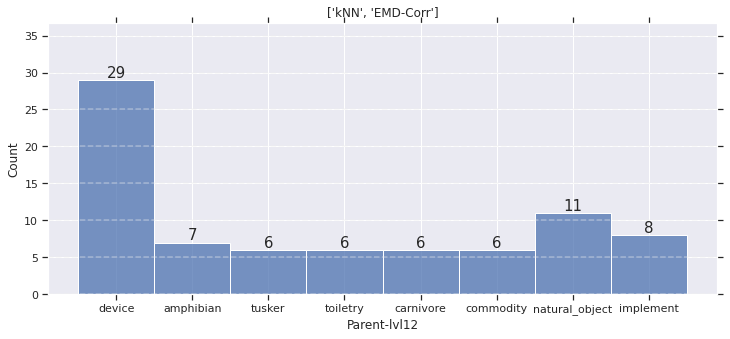

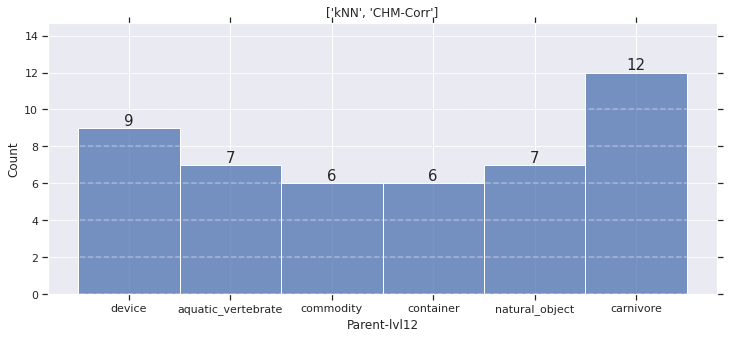

In [80]:
for method_pair in Pairs:
  common_qs = df[df.Method.isin(method_pair)].groupby(['Query', 'Method'])[['Correctness']].count().unstack().dropna().stack().reset_index()['Query']
  df_shared = df[(df['Query'].isin(common_qs)) & df.Method.isin(method_pair)]
  plot_parents(df_shared, method_pair)
  plot_queries(df_shared, method_pair)
  # break

# Samples All users failed to Accept correct AI decision

### kNN

In [83]:
subset_a = df[df['ClassifierCorrectness']==0]
knn_subset_a = subset_a[subset_a['Method'].isin(['kNN'])]

In [84]:
confused_knn_users = knn_subset_a.groupby('Query')['Correctness'].agg(['mean', 'count']).reset_index()
confused_knn_users = confused_knn_users[(confused_knn_users['count']>=3)&(confused_knn_users['mean']==0)]

In [85]:
knn_subset_a.head(5)

,UID,Query,Prior Knowledge,Counter balance,Group Known,Group Unknown,Validation Reaction Time,Test Reaction Time,DATE,Group Validation Correct,Group Validation Incorrect,ImageNet,Correctness,User Accuracy,User Corrects,Method,GroundTruth,Parent-lvl12,Parent-lvl13,Parent-lvl14,ClassifierCorrectness,DifficultyLevel,ConfidenceScore,ResNet-Prediction,KNN-Prediction,EMD-Prediction,CHM-Prediction,ResNet-Conf,KNN-Conf,EMD-Conf,CHM-Conf,Real GTs,Real WNIDs,Parent-lvl12_real,Parent-lvl13_real,Parent-lvl14_real
10798,6382857,ILSVRC2012_val_00006160.JPEG,1,4,21,4,356725.19,355038,2022-04-29 17:04:00.455,10,0,25,1,0.833333,25,kNN,n04069434,equipment,equipment,equipment,0,Hard,0.80,Polaroid_camera,Polaroid_camera,Polaroid_camera,Polaroid_camera,0.72,0.80,0.75,0.9,['reflex_camera'],['n04069434'],['equipment'],['equipment'],['equipment']
10204,6395801,ILSVRC2012_val_00042318.JPEG,1,4,24,0,325169.50,324017,2022-05-03 03:23:00.298,10,0,24,0,0.800000,24,kNN,n02089973,carnivore,canine,dog,0,Medium,0.60,English_foxhound,Walker_hound,Walker_hound,Walker_hound,0.65,0.60,0.55,0.5,['English_foxhound'],['n02089973'],['carnivore'],['canine'],['dog']
10203,6395801,ILSVRC2012_val_00039703.JPEG,1,4,24,0,325169.50,324017,2022-05-03 03:23:00.298,10,0,24,1,0.800000,24,kNN,n03873416,implement,implement,implement,0,Medium,0.70,paddle,canoe,canoe,canoe,0.61,0.70,0.60,0.7,['paddle'],['n03873416'],['implement'],['implement'],['implement']
10201,6395801,ILSVRC2012_val_00001166.JPEG,1,4,24,0,325169.50,324017,2022-05-03 03:23:00.298,10,0,24,1,0.800000,24,kNN,n04371430,commodity,commodity,commodity,0,Easy,0.15,folding_chair,golfcart,accordion,panpipe,0.13,0.15,0.20,0.2,"['folding_chair', 'sunglass', 'sunglasses', 's...","['n03376595', 'n04355933', 'n04356056', 'n0437...","['furnishing', 'device', 'device', 'commodity']","['furnishing', 'device', 'device', 'commodity']","['furnishing', 'device', 'device', 'commodity']"
10200,6395801,ILSVRC2012_val_00009218.JPEG,1,4,24,0,325169.50,324017,2022-05-03 03:23:00.298,10,0,24,1,0.800000,24,kNN,n02667093,commodity,commodity,commodity,0,Medium,0.50,vestment,bonnet,bonnet,bonnet,0.38,0.50,0.35,0.5,['abaya'],['n02667093'],['commodity'],['commodity'],['commodity']


In [86]:
knn_preds = {x[0]:x[1] for x in df[['Query', 'KNN-Prediction']].values}
real_gts       = {x[0]:x[1] for x in df[['Query', 'Real GTs']].values}

In [91]:
pp = PdfPages(f'../plots/confusing-xai/kNN/accepeting_wrong_knn.pdf')

for i, row in confused_knn_users.iterrows():
  q = row[0]
  m = row[1]
  c = row[2]
  fig, axes = plt.subplots(2, 1, figsize=(25,5), facecolor=(1,1,1), gridspec_kw={'height_ratios': [3, 16]})
  
  ax1, ax2 = axes
  ax1.set_axis_off()
  ax2.set_axis_off()
  ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/HS_KNNs/{q}', 0,0,0,0))
  ax2.set_axis_off()
  
  ax1.text(0.035, 0.9, f"Query: {q.replace('.jpg', '')}" ,fontsize=15)
  ax1.text(0.035, 0.1, f"kNN Prediction: {knn_preds[q]}" ,fontsize=15, color='red')
  ax1.text(0.4, 0.9, f"Number of Users: {c}" ,fontsize=16)
  ax1.text(0.4, 0.1, f"Mean Accuracy: {m}" ,fontsize=16, color='red')

  str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts[q])])
  ax1.text(0.75, 0.5, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')
  
  fig.savefig(f'../plots/confusing-xai/kNN/accepeting_wrong_knn-{i}.pdf', dpi=100, bbox_inches='tight')
  pp.savefig(fig)
  plt.close()

pp.close()

### EMD-Corr

In [92]:
subset_a = df[df['ClassifierCorrectness']==0]
chm_subset_a = subset_a[subset_a['Method'].isin(['EMD-Corr'])]

In [93]:
confused_cmh_users = chm_subset_a.groupby('Query')['Correctness'].agg(['mean', 'count']).reset_index()
confused_cmh_users = confused_cmh_users[(confused_cmh_users['count']>=3)&(confused_cmh_users['mean']==0)]

In [94]:
emd_preds = {x[0]:x[1] for x in df[['Query', 'EMD-Prediction']].values}
real_gts       = {x[0]:x[1] for x in df[['Query', 'Real GTs']].values}

In [95]:
pp = PdfPages(f'../plots/confusing-xai/EMD/accepeting_wrong_EMD_corr.pdf')

for i, row in confused_cmh_users.iterrows():
  q = row[0]
  m = row[1]
  c = row[2]
  fig, axes = plt.subplots(1, 2, figsize=(25,5), facecolor=(1,1,1), gridspec_kw={'width_ratios': [2, 16]})
  
  ax1, ax2 = axes
  ax1.set_axis_off()
  ax2.set_axis_off()
  ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/HS_EMD_Corrs/{q}', 0,0,0,0))
  ax2.set_axis_off()
  
  ax1.text(0, .9, f"Query: {q.replace('.jpg', '')}" ,fontsize=15)
  ax1.text(0, .8, f"EMD Prediction: {emd_preds[q]}" ,fontsize=15, color='red')
  ax1.text(0, .7, f"Number of Users: {c}" ,fontsize=16)
  ax1.text(0, .6, f"Mean Accuracy: {m}" ,fontsize=16, color='red')

  str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts[q])])
  ax1.text(0, .5, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')
  fig.savefig(f'../plots/confusing-xai/EMD/accepeting_wrong_EMD_Corr-{i}.pdf', dpi=100, bbox_inches='tight')
  pp.savefig(fig)
  plt.close()

pp.close()

### EMD-NN


In [96]:
subset_a = df[df['ClassifierCorrectness']==0]
chm_subset_a = subset_a[subset_a['Method'].isin(['EMD-NN'])]

In [97]:
confused_cmh_users = chm_subset_a.groupby('Query')['Correctness'].agg(['mean', 'count']).reset_index()
confused_cmh_users = confused_cmh_users[(confused_cmh_users['count']>=3)&(confused_cmh_users['mean']==0)]

In [98]:
emd_preds = {x[0]:x[1] for x in df[['Query', 'EMD-Prediction']].values}
real_gts       = {x[0]:x[1] for x in df[['Query', 'Real GTs']].values}

In [99]:
pp = PdfPages(f'../plots/confusing-xai/EMD/accepeting_wrong_EMD_NN.pdf')

for i, row in confused_cmh_users.iterrows():
  q = row[0]
  m = row[1]
  c = row[2]
  fig, axes = plt.subplots(2, 1, figsize=(25,5), facecolor=(1,1,1), gridspec_kw={'height_ratios': [3, 16]})
  
  ax1, ax2 = axes
  ax1.set_axis_off()
  ax2.set_axis_off()
  ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/HS_EMD_NNs/{q}', 0,0,0,0))
  ax2.set_axis_off()
  
  ax1.text(0.035, 0.9, f"Query: {q.replace('.jpg', '')}" ,fontsize=15)
  ax1.text(0.035, 0.1, f"EMD Prediction: {emd_preds[q]}" ,fontsize=15, color='red')
  ax1.text(0.4, 0.9, f"Number of Users: {c}" ,fontsize=16)
  ax1.text(0.4, 0.1, f"Mean Accuracy: {m}" ,fontsize=16, color='red')

  str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts[q])])
  ax1.text(0.75, 0.5, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')
  fig.savefig(f'../plots/confusing-xai/EMD/accepeting_wrong_EMD_NN-{i}.pdf', dpi=100, bbox_inches='tight')

  pp.savefig(fig)
  plt.close()

pp.close()

### CHM-Corr

In [100]:
subset_a = df[df['ClassifierCorrectness']==0]
chm_subset_a = subset_a[subset_a['Method'].isin(['CHM-Corr'])]

In [101]:
confused_cmh_users = chm_subset_a.groupby('Query')['Correctness'].agg(['mean', 'count']).reset_index()
confused_cmh_users = confused_cmh_users[(confused_cmh_users['count']>=3)&(confused_cmh_users['mean']==0)]

In [102]:
chm_preds = {x[0]:x[1] for x in df[['Query', 'CHM-Prediction']].values}
real_gts       = {x[0]:x[1] for x in df[['Query', 'Real GTs']].values}

In [103]:
pp = PdfPages(f'../plots/confusing-xai/CHM/accepeting_wrong_chm_corr.pdf')

for i, row in confused_cmh_users.iterrows():
  q = row[0]
  m = row[1]
  c = row[2]
  fig, axes = plt.subplots(1, 2, figsize=(25,5), facecolor=(1,1,1), gridspec_kw={'width_ratios': [2, 16]})
  
  ax1, ax2 = axes
  ax1.set_axis_off()
  ax2.set_axis_off()
  ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/HS_CHM_Corrs/{q}', 0,0,0,0))
  ax2.set_axis_off()
  
  ax1.text(0, .9, f"Query: {q.replace('.jpg', '')}" ,fontsize=15)
  ax1.text(0, .8, f"CHM Prediction: {chm_preds[q]}" ,fontsize=15, color='red')
  ax1.text(0, .7, f"Number of Users: {c}" ,fontsize=16)
  ax1.text(0, .6, f"Mean Accuracy: {m}" ,fontsize=16, color='red')

  str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts[q])])
  ax1.text(0, .5, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')
  fig.savefig(f'../plots/confusing-xai/CHM/accepeting_wrong_CHM_Corr-{i}.pdf', dpi=100, bbox_inches='tight')
  pp.savefig(fig)
  plt.close()

pp.close()

### CHM-NN

In [104]:
subset_a = df[df['ClassifierCorrectness']==0]
chm_subset_a = subset_a[subset_a['Method'].isin(['CHM-NN'])]

In [105]:
confused_cmh_users = chm_subset_a.groupby('Query')['Correctness'].agg(['mean', 'count']).reset_index()
confused_cmh_users = confused_cmh_users[(confused_cmh_users['count']>=3)&(confused_cmh_users['mean']==0)]

In [106]:
chm_preds = {x[0]:x[1] for x in df[['Query', 'CHM-Prediction']].values}
real_gts       = {x[0]:x[1] for x in df[['Query', 'Real GTs']].values}

In [107]:
pp = PdfPages(f'../plots/confusing-xai/CHM/accepeting_wrong_chm_NN.pdf')

for i, row in confused_cmh_users.iterrows():
  q = row[0]
  m = row[1]
  c = row[2]
  fig, axes = plt.subplots(2, 1, figsize=(25,5), facecolor=(1,1,1), gridspec_kw={'height_ratios': [3, 16]})
  
  ax1, ax2 = axes
  ax1.set_axis_off()
  ax2.set_axis_off()
  ax2.imshow(load_part_of_image(f'/mnt/NeurIPS/supporting_files/HS_CHM_NNs//{q}', 0,0,0,0))
  ax2.set_axis_off()
  
  ax1.text(0.035, 0.9, f"Query: {q.replace('.jpg', '')}" ,fontsize=15)
  ax1.text(0.035, 0.1, f"CHM Prediction: {chm_preds[q]}" ,fontsize=15, color='red')
  ax1.text(0.4, 0.9, f"Number of Users: {c}" ,fontsize=16)
  ax1.text(0.4, 0.1, f"Mean Accuracy: {m}" ,fontsize=16, color='red')

  str_real_gts = ', '.join([x.replace('_', ' ').title() for x in ast.literal_eval(real_gts[q])])
  ax1.text(0.75, 0.5, f"Real GT(s): {str_real_gts}" ,fontsize=16, color='blue')
  fig.savefig(f'../plots/confusing-xai/CHM/accepeting_wrong_CHM_NN-{i}.pdf', dpi=100, bbox_inches='tight')

  pp.savefig(fig)
  plt.close()

pp.close()